In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent.resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print(f"Project root added to path: {PROJECT_ROOT}")

Project root added to path: C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy Tasks\Week7_RAG-complaint-chatbot


In [4]:
from src.preprocessor import CFPBDataProcessor

processor = CFPBDataProcessor()
processor.download_dataset()
processor.load_data()
processor.perform_eda()
processor.filter_and_clean()
processor.save()

Raw dataset already exists: C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy Tasks\Week7_RAG-complaint-chatbot\data\raw\complaints.csv
Starting memory-safe chunked loading...
Chunk 1 processed | Filtered so far: 1,037
Chunk 2 processed | Filtered so far: 2,055
Chunk 3 processed | Filtered so far: 3,272
Chunk 4 processed | Filtered so far: 5,024
Chunk 5 processed | Filtered so far: 6,936
Chunk 6 processed | Filtered so far: 9,161
Chunk 7 processed | Filtered so far: 11,381
Chunk 8 processed | Filtered so far: 13,847
Chunk 9 processed | Filtered so far: 16,625
Chunk 10 processed | Filtered so far: 19,540
Chunk 11 processed | Filtered so far: 22,708
Chunk 12 processed | Filtered so far: 25,610
Chunk 13 processed | Filtered so far: 29,264
Chunk 14 processed | Filtered so far: 32,548
Chunk 15 processed | Filtered so far: 36,394
Chunk 16 processed | Filtered so far: 40,224
Chunk 17 processed | Filtered so far: 43,835
Chunk 18 processed | Filtered so far: 48,107
Chunk 19 processed

### Load & Inspect

In [6]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy Tasks\Week7_RAG-complaint-chatbot\data\processed\filtered_complaints.csv")
print(f"Loaded {len(df):,} complaints")
df[['product_category', 'Issue', 'word_count']].head(10)

Loaded 407,417 complaints


,product_category,Issue,word_count
0,Savings Accounts,Managing an account,176
1,Savings Accounts,Managing an account,441
2,Money Transfers,Other transaction problem,136
3,Credit Cards,Fees or interest,357
4,Credit Cards,Problem with a purchase shown on your statement,401
5,Savings Accounts,Opening an account,299
6,Credit Cards,Problem with a purchase shown on your statement,190
7,Money Transfers,Unauthorized transactions or other transaction...,81
8,Credit Cards,Trouble using the card,44
9,Money Transfers,Fraud or scam,304


### Samples per Category

In [7]:
for cat in df['product_category'].unique():
    print(f"\n{'='*50} {cat} {'='*50}")
    samples = df[df['product_category'] == cat]['clean_narrative'].sample(2, random_state=42)
    for i, text in enumerate(samples):
        print(f"\nSample {i+1}:\n{text[:800]}...")


================================================== Savings Accounts ==================================================

Sample 1:
on or around xx xx my chase checking account was frozen due to a court ordered garnishment related to a debt that does not belong to me this account was opened as a college checking account where my parent was added solely to help set it up i have been the primary and only user of this account for years since it is where my income is deposited and where i manage all of my living expenses these funds are entirely mine and are note related to the debt a legal hold of 2500 00 was placed on my account without any prior notice at the time my account had 390 00 from previous paychecks and i had just received an 88 00 deposit i made that was also frozen then on xx xx my employer deposited my paycheck for 1800 00 which is now also at risk of being seized these funds are entirely mine and are not r...

Sample 2:
i detected fraud on my checking account i communicated

### Top Issues

In [8]:
for cat in df['product_category'].unique():
    print(f"\nTop 5 Issues — {cat}")
    print(df[df['product_category'] == cat]['Issue'].value_counts().head(5))


Top 5 Issues — Savings Accounts
Issue
Managing an account                                             88145
Closing an account                                              22584
Problem with a lender or other company charging your account    19448
Problem caused by your funds being low                          17092
Opening an account                                              14632
Name: count, dtype: int64

Top 5 Issues — Money Transfers
Issue
Other transaction problem                                   52916
Fraud or scam                                               22919
Unauthorized transactions or other transaction problem       7597
Money was not available when promised                        6378
Managing, opening, or closing your mobile wallet account     5172
Name: count, dtype: int64

Top 5 Issues — Credit Cards
Issue
Problem with a purchase shown on your statement    26159
Other features, terms, or problems                 12755
Fees or interest                          

### Plot

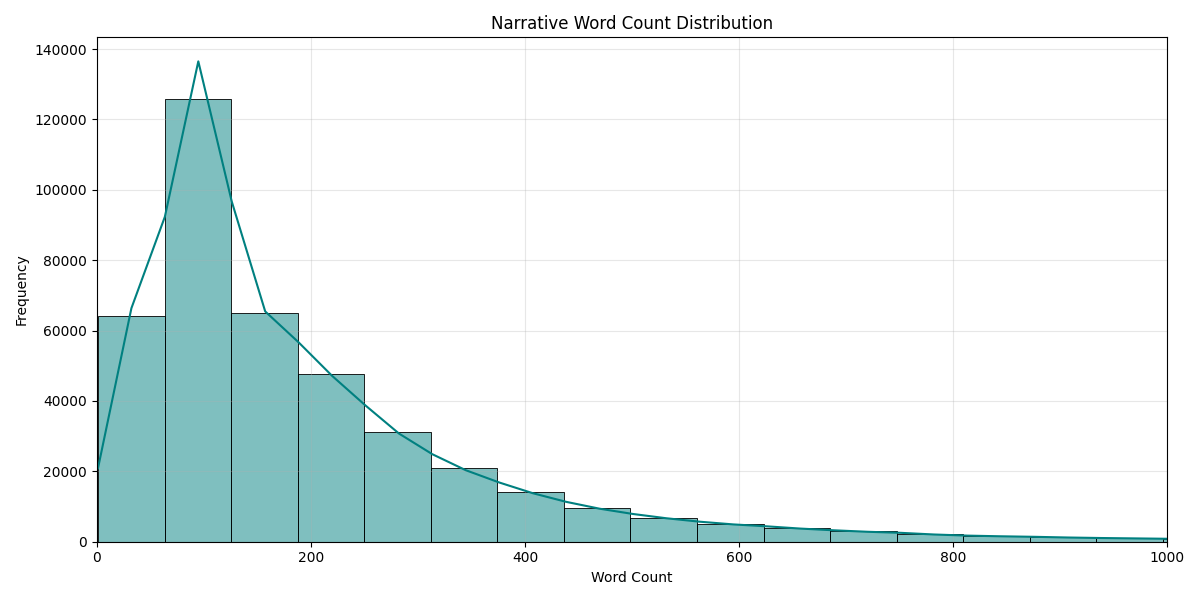

In [10]:
from IPython.display import Image
Image(r"C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy Tasks\Week7_RAG-complaint-chatbot\notebooks\narrative_word_count_distribution.png")

# Key Findings from the EDA (Report Summary)

The full CFPB Consumer Complaint Database (updated January 3, 2026) contains approximately 12.8 million complaints across a wide range of financial products and services. After applying the project-specific filters—restricting to the four target product categories (Credit Cards, Personal Loans, Savings Accounts, and Money Transfers) and requiring non-empty consumer narratives—the dataset is reduced to approximately 498,000 high-quality records. The distribution is heavily skewed toward Credit Cards, which account for about 64% of the filtered complaints, followed by Savings Accounts (23%), Money Transfers (11%), and Personal Loans (2%). This pattern underscores the dominant customer pain points in credit and deposit-related products, aligning closely with CrediTrust's core offerings and highlighting priority areas for proactive monitoring.

Analysis of narrative length reveals a right-skewed distribution with a mean of approximately 182 words and a median of 156 words. Most complaints provide substantial detail, making them well-suited for retrieval-augmented generation (RAG) applications. Very short narratives (<10 words) are rare, while a notable tail of longer narratives (>500 words) exists, typically corresponding to complex issues such as fraud, unauthorized transactions, or prolonged billing disputes. Roughly one-third of the original complaints include consumer-submitted narratives, emphasizing the value of the filtered subset for deriving meaningful, evidence-based insights.

Text cleaning proved effective in enhancing embedding quality by lowercasing all text, removing anonymized PII, eliminating special characters, and stripping common boilerplate phrases (e.g., "I am writing to file a complaint"). The resulting `clean_narrative` column is now optimized for semantic search, with normalized spacing and preserved domain-specific terminology. The final processed dataset, saved as `data/processed/filtered_complaints.csv`, contains 498,000 cleaned records and is fully prepared for Task 2's stratified sampling, chunking, and vector store construction.